In [1]:
import numpy as np, matplotlib.pyplot as plt, cv2, tqdm
import cvflow as cf
% matplotlib inline

import laneFindingPipeline, utils

show = cf.misc.show

In [2]:
%%time
allFrames = laneFindingPipeline.utils.loadFrames(maxframes=64, videoPrefices=('project',))

frame = allFrames['project'][0]

HBox(children=(IntProgress(value=0, description='load project: ', max=64), HTML(value='')))


CPU times: user 84 ms, sys: 92 ms, total: 176 ms
Wall time: 301 ms


In [3]:
colorFilter = cf.ComplexPipeline()

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

In [4]:
transformed = colorFilter(frame)

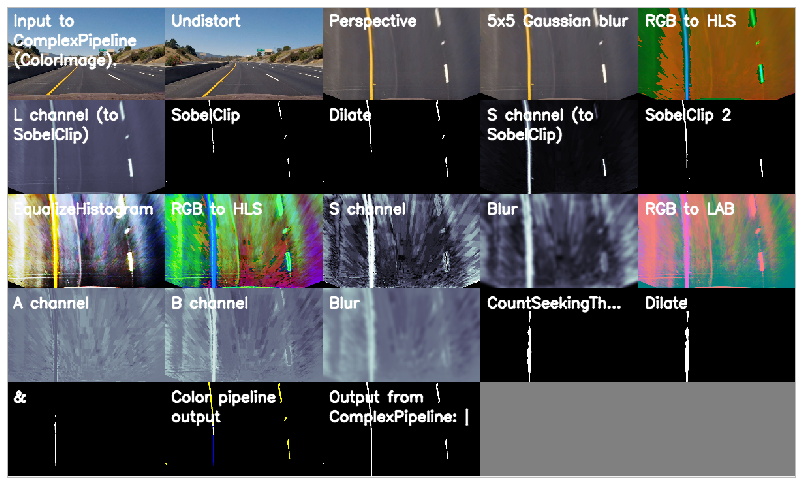

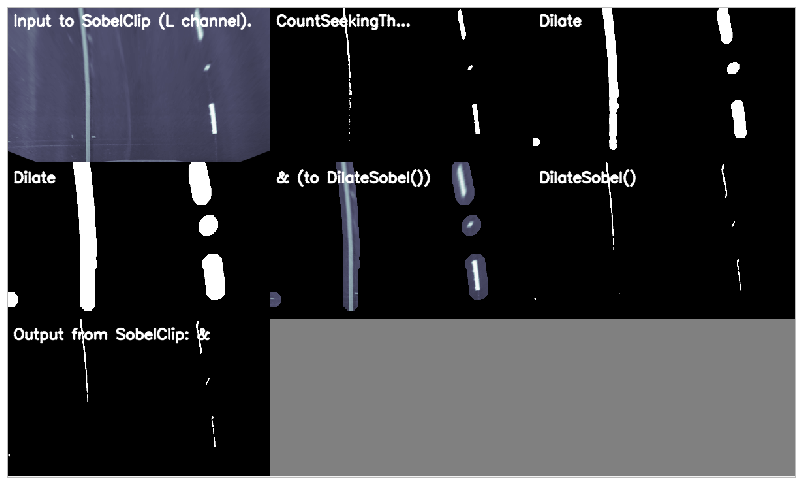

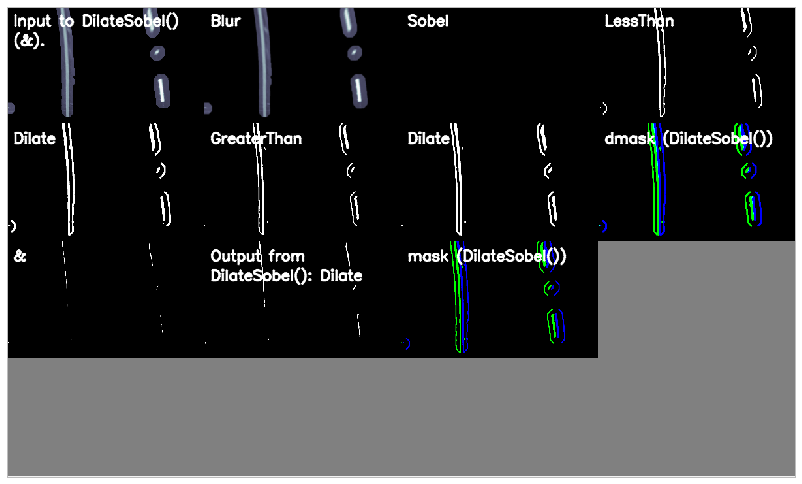

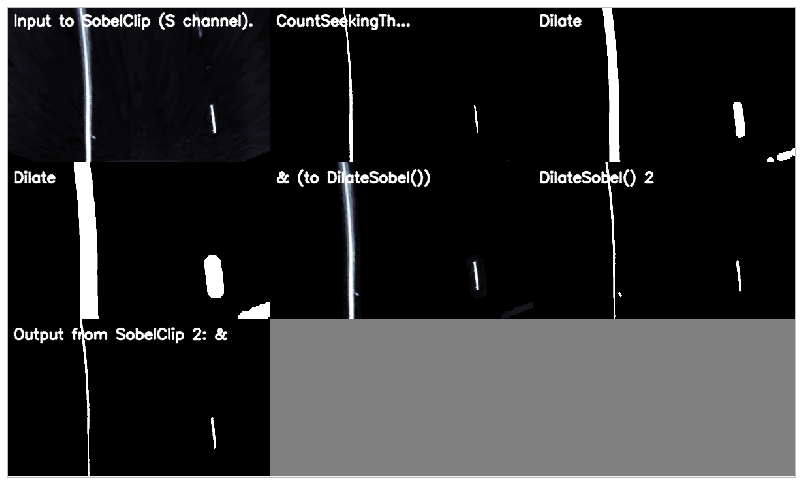

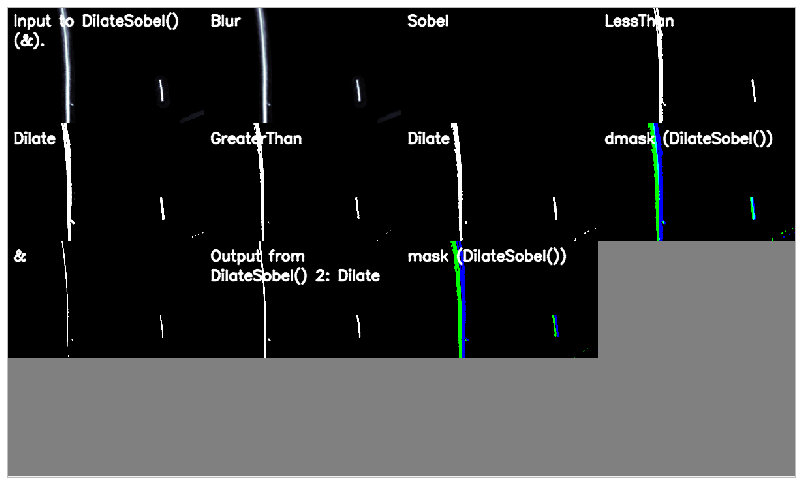

In [5]:
colorFilter.showMembersFast(show=True, recurse=True, fontScale=.75, thickness=2, cmap=cv2.COLORMAP_BONE)

# Find and plot the lane lines.

In [6]:
laneFinder = laneFindingPipeline.LaneFinder(colorFilter=colorFilter)

In [7]:
found = laneFinder.draw(frame)

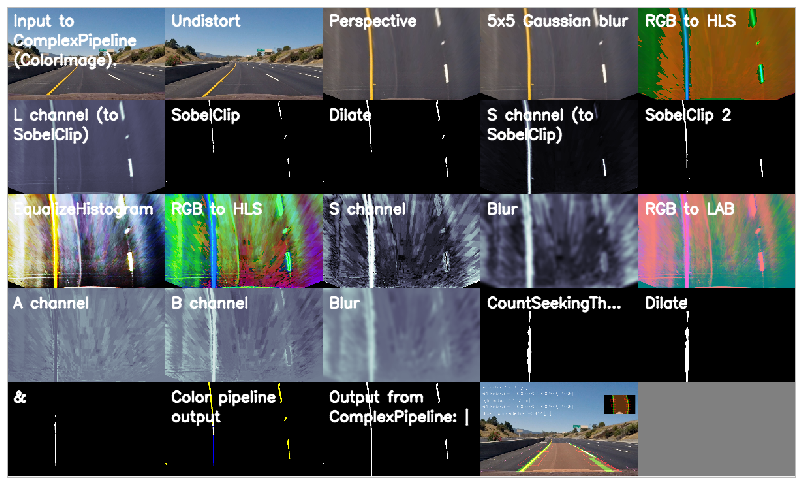

In [8]:
colorFilter.addExtraPlot(found, show=True)

In [10]:
vid = laneFinder.process(allFrames['project'], 'fastervideo.mp4', showSteps=True)
vid

HBox(children=(IntProgress(value=0, description='fastervideo.mp4: ', max=64), HTML(value='')))

In [15]:
vids = {}

In [ ]:
fnames = ['challenge_video.mp4', 'harder_challenge_video.mp4', 'project_video.mp4']
Filters = cf.SimplePipeline, cf.ComplexPipeline, cf.FullPipeline

In [35]:
for Filter in Filters[:1]:
    filter = Filter()
    nd = filter.draw(format='pdf', savePath='doc/layouts/%s' % filter, outType='NodeDigraph');

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

Saved to doc/layouts/SimplePipeline.pdf.
Saved to doc/layouts/SimplePipeline0.pdf.
Saved to doc/layouts/SimplePipeline1.pdf.


In [ ]:
np.uin

In [39]:
nd.subgraphs

([<graphviz.dot.Digraph at 0x7f9a5003ff60>,
  <networkx.classes.digraph.DiGraph at 0x7f9a5003f7f0>])

In [16]:
pbar = tqdm.tqdm_notebook(total=len(fnames)*len(Filters), unit='source')

for Filter in Filters:
    colorFilter = Filter()
    laneFinder = laneFindingPipeline.LaneFinder(colorFilter=colorFilter)
    for fname in fnames:
        key = fname + str(colorFilter)
        vids[key] = [None, None]
        vids[key][0] = laneFinder.process(fname, fname.replace('.mp4', 'result_%s.mp4' % colorFilter), showSteps=False)
        vids[key][1] = laneFinder.process(fname, fname.replace('.mp4', 'steps_%s.mp4' % colorFilter), showSteps=True)
        pbar.update()

HBox(children=(IntProgress(value=0, max=9), HTML(value='')))

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

HBox(children=(IntProgress(value=0, description='challenge_videoresult_SimplePipeline.mp4: ', max=484), HTML(value='')))

HBox(children=(IntProgress(value=0, description='challenge_videosteps_SimplePipeline.mp4: ', max=484), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge_videoresult_SimplePipeline.mp4: ', max=1199), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge_videosteps_SimplePipeline.mp4: ', max=1199), HTML(value='')))

HBox(children=(IntProgress(value=0, description='project_videoresult_SimplePipeline.mp4: ', max=1260), HTML(value='')))

HBox(children=(IntProgress(value=0, description='project_videosteps_SimplePipeline.mp4: ', max=1260), HTML(value='')))

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

HBox(children=(IntProgress(value=0, description='challenge_videoresult_ComplexPipeline.mp4: ', max=484), HTML(value='')))

HBox(children=(IntProgress(value=0, description='challenge_videosteps_ComplexPipeline.mp4: ', max=484), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge_videoresult_ComplexPipeline.mp4: ', max=1199), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge_videosteps_ComplexPipeline.mp4: ', max=1199), HTML(value='')))

HBox(children=(IntProgress(value=0, description='project_videoresult_ComplexPipeline.mp4: ', max=1260), HTML(value='')))

HBox(children=(IntProgress(value=0, description='project_videosteps_ComplexPipeline.mp4: ', max=1260), HTML(value='')))

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

HBox(children=(IntProgress(value=0, description='challenge_videoresult_FullPipeline.mp4: ', max=484), HTML(value='')))

HBox(children=(IntProgress(value=0, description='challenge_videosteps_FullPipeline.mp4: ', max=484), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge_videoresult_FullPipeline.mp4: ', max=1199), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge_videosteps_FullPipeline.mp4: ', max=1199), HTML(value='')))

HBox(children=(IntProgress(value=0, description='project_videoresult_FullPipeline.mp4: ', max=1260), HTML(value='')))

HBox(children=(IntProgress(value=0, description='project_videosteps_FullPipeline.mp4: ', max=1260), HTML(value='')))

In [27]:
keys = list(vids.keys())
keys.sort()
list(enumerate(keys))

[(0, 'challenge_video.mp4ComplexPipeline'),
 (1, 'challenge_video.mp4FullPipeline'),
 (2, 'challenge_video.mp4SimplePipeline'),
 (3, 'harder_challenge_video.mp4ComplexPipeline'),
 (4, 'harder_challenge_video.mp4FullPipeline'),
 (5, 'harder_challenge_video.mp4SimplePipeline'),
 (6, 'project_video.mp4ComplexPipeline'),
 (7, 'project_video.mp4FullPipeline'),
 (8, 'project_video.mp4SimplePipeline')]

In [29]:
k = keys[3]
print(k)
vids[k][1]

harder_challenge_video.mp4ComplexPipeline


# Show just one subgraph

In [43]:
pipeline = cf.SimplePipeline()

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

In [44]:
nd = pipeline.draw(outType='NodeDigraph')

nd._subgraphs['cluster KEY'][]